![Crowded city](city-1265055_1280.jpg)

In the quest for efficiency and effectiveness in urban transportation, finding the optimal routes to take passengers from their initial locations to their desired destinations is paramount. This challenge is not just about reducing travel time; it's about enhancing the overall experience for both drivers and passengers, ensuring safety, and minimizing environmental impact. 

You have been asked to revolutionize the way taxis navigate the urban landscape, ensuring passengers reach their destinations swiftly, safely, and satisfactorily. As an initial step, your goal is to build a reinforcement learning agent that solves this problem within a simulated environment.

## The Taxi-v3 environment
The Taxi-v3 environment is a strategic simulation, offering a grid-based arena where a taxi navigates to address daily challenges akin to those faced by a taxi driver. This environment is defined by a 5x5 grid where the taxi's mission involves picking up a passenger from one of four specific locations (marked as Red, Green, Yellow, and Blue) and dropping them off at another designated spot. The goal is to accomplish this with minimal time on the road to maximize rewards, emphasizing the need for route optimization and efficient decision-making for passenger pickup and dropoff.

### Key Components:
- **Action Space:** Comprises six actions where 0 moves the taxi south, 1 north, 2 east, 3 west, 4 picks up a passenger, and 5 drops off a passenger.
- **Observation Space:** Comprises 500 discrete states, accounting for 25 taxi positions, 5 potential passenger locations, and 4 destinations. 
- **Rewards System:** Includes a penalty of -1 for each step taken without other rewards, +20 for successful passenger delivery, and -10 for illegal pickup or dropoff actions. Actions resulting in no operation, like hitting a wall, also incur a time step penalty.

![Taxi-v3 environment snapshot](Taxi_snap.png)


In [8]:
# Re-run this cell to install and import the necessary libraries and load the required variables
import numpy as np
import gymnasium as gym
import imageio
from IPython.display import Image
from gymnasium.utils import seeding

# Initialize the Taxi-v3 environment
env = gym.make("Taxi-v3", render_mode='rgb_array')

# Seed the environment for reproducibility
env.np_random, _ = seeding.np_random(42)
env.action_space.seed(42)
np.random.seed(42)

# Maximum number of actions per training episode
max_actions = 100
num_episodes = 2000
alpha = 0.1
gamma = 1

In [9]:
# Start coding here
# Feel free to add as many cells as you want
episode_returns = []
num_states  , num_actions = env.observation_space.n , env.action_space.n
Q = np.zeros([num_states , num_actions])
Q

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [10]:
def UpdateQTable(next_state , reward , action , state):
    Qold = Q[state , action]
    Qnext = max(Q[next_state])

    Q[state , action] = (1 - alpha) * Qold + alpha * (reward + gamma * Qnext)

In [11]:
def get_policy():
    policy = {state : np.argmax(Q[state]) for state in range(num_states)}
    return policy

In [12]:
epsilon = 0.1 

policy = get_policy()

for episode in range(num_episodes):
    state, info = env.reset()
    terminated = False
    truncated = False
    step_count = 0
    episode_reward = 0
    
    while not (terminated or truncated):
        if np.random.random() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state])
        
        next_state, reward, terminated, truncated, info = env.step(action)
        UpdateQTable(next_state, reward, action, state)
        episode_reward += reward
        state = next_state
        step_count += 1
    
   
    policy = get_policy()
    
    episode_returns.append(episode_reward)

q_table = Q.copy()

In [13]:
step_count = 0
state , info = env.reset()
env.action_space.seed(42)
frames = []
terminated = False
episode_total_reward = 0
while not terminated and step_count < 16:
    action = policy[state]
    next_state , reward , terminated , truncated , info = env.step(action)
    episode_total_reward += reward
    state = next_state
    frames.append(env.render())
    step_count += 1

print(frames , episode_total_reward)

[array([[[110, 109, 106],
        [110, 109, 106],
        [124, 122, 122],
        ...,
        [108, 111, 109],
        [108, 111, 109],
        [118, 119, 119]],

       [[110, 109, 106],
        [110, 109, 106],
        [124, 122, 122],
        ...,
        [108, 111, 109],
        [108, 111, 109],
        [118, 119, 119]],

       [[114, 116, 115],
        [114, 116, 115],
        [126, 127, 126],
        ...,
        [112, 113, 111],
        [112, 113, 111],
        [118, 117, 115]],

       ...,

       [[116, 115, 116],
        [116, 115, 116],
        [106, 107, 108],
        ...,
        [113, 115, 114],
        [113, 115, 114],
        [117, 114, 117]],

       [[116, 115, 116],
        [116, 115, 116],
        [106, 107, 108],
        ...,
        [113, 115, 114],
        [113, 115, 114],
        [117, 114, 117]],

       [[115, 112, 112],
        [115, 112, 112],
        [119, 119, 117],
        ...,
        [123, 119, 118],
        [123, 119, 118],
        [114, 114, 117]

error: XDG_RUNTIME_DIR not set in the environment.


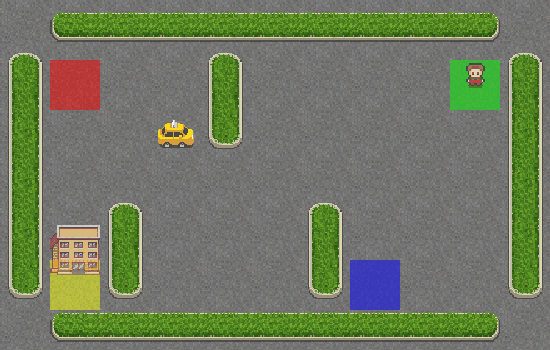

In [14]:
# Once you are done, run this cell to visualize the agent's behavior through the episode
# Save frames as a GIF
imageio.mimsave('taxi_agent_behavior.gif', frames, fps=5, loop=0)

# Display GIF
gif_path = "taxi_agent_behavior.gif" 
Image(gif_path) 